<a href="https://colab.research.google.com/github/txc-000/repo-3/blob/main/percobaan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

os.makedirs("data/asl_data", exist_ok=True)


In [ ]:
!mkdir -p data/asl_data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sign_mnist_test.csv to sign_mnist_test (1).csv
Saving sign_mnist_train.csv to sign_mnist_train (1).csv


In [ ]:
import shutil

shutil.move("sign_mnist_train.csv", "data/asl_data/sign_mnist_train.csv")
shutil.move("sign_mnist_test.csv", "data/asl_data/sign_mnist_valid.csv")

'data/asl_data/sign_mnist_valid.csv'

In [ ]:
import pandas as pd

In [ ]:
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

In [ ]:
x_train = train_df.values
x_valid = valid_df.values

In [ ]:
x_train.shape

(27455, 784)

In [ ]:
y_train.shape

(27455,)

In [ ]:
x_valid.shape

(7172, 784)

In [ ]:
y_valid.shape

(7172,)

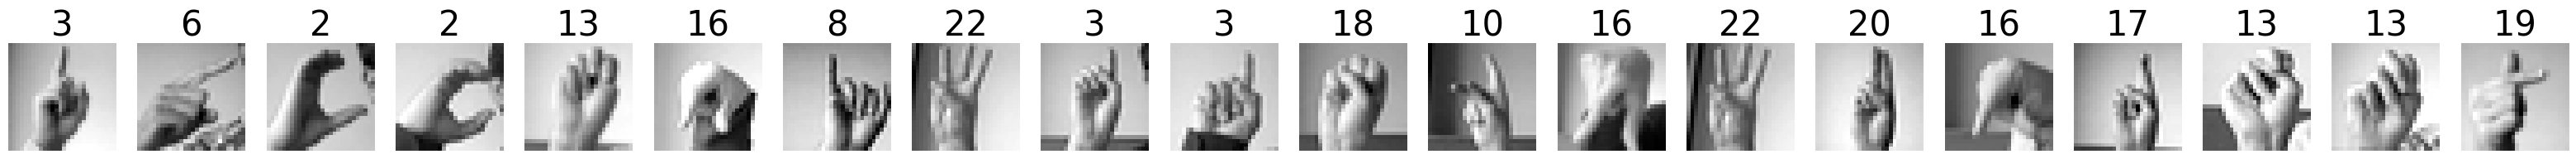

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

255

In [ ]:
# TODO: Normalize x_train and x_valid.
x_train = x_train / 255
x_valid = x_valid / 255

In [ ]:
import tensorflow.keras as keras
num_classes = 24

In [ ]:
# TODO: Categorically encode y_train and y_valid.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# TODO: build a model following the guidelines above.
model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │          12,312 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676,888 (2.58 MB)

 Trainable params: 676,888 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# TODO: Train the model for 20 epochs.
model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.2454 - loss: 2.4877 - val_accuracy: 0.5017 - val_loss: 1.5768
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6275 - loss: 1.0999 - val_accuracy: 0.7073 - val_loss: 0.9593
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.7770 - loss: 0.6519 - val_accuracy: 0.5864 - val_loss: 1.6723
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8596 - loss: 0.4142 - val_accuracy: 0.6829 - val_loss: 1.3042
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9040 - loss: 0.3095 - val_accuracy: 0.8016 - val_loss: 0.7563
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9249 - loss: 0.2502 - val_accuracy: 0.7995 - val_loss: 0.9283
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9447 - loss: 0.2217 - val_accuracy: 0.8026 - val_loss: 0.9501
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9520 - loss: 0.2014 - 

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}